In [1]:
#IMPORTING LIBRARIES 

# Data Manipulation and Exploration Libraries
import numpy as np
import pandas as pd

# Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv("NIFTY.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,07-AUG-2023,19576.85,19620.45,19524.80,19597.30,216586074.0,21655.87
1,08-AUG-2023,19627.20,19634.40,19533.10,19570.85,260294052.0,25437.47
2,09-AUG-2023,19578.80,19645.50,19467.50,19632.55,266495074.0,23201.75
3,10-AUG-2023,19605.55,19623.60,19495.40,19543.10,312193785.0,29430.34
4,11-AUG-2023,19554.25,19557.75,19412.75,19428.30,235524048.0,24521.24


In [3]:
print(" A STATISTICAL SUMMARY OF THE VALUES IN THE DATASET ")
print(" ")
df.describe()

 A STATISTICAL SUMMARY OF THE VALUES IN THE DATASET 
 


,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,249.000000,249.000000,249.000000,249.000000,2.480000e+02,248.000000
mean,21598.482329,21683.773293,21487.543574,21592.458635,3.063947e+08,29496.514355
std,1644.074540,1660.316643,1623.891535,1645.476507,1.074308e+08,10984.582537
min,18928.750000,19041.700000,18837.850000,18857.250000,1.906457e+07,1572.770000
25%,19784.000000,19840.950000,19728.050000,19794.000000,2.358050e+08,22475.532500
50%,21812.750000,21930.900000,21680.850000,21817.450000,2.917112e+08,28335.330000
75%,22561.600000,22625.950000,22417.000000,22513.700000,3.576710e+08,34304.830000
max,25030.950000,25078.300000,24956.400000,25010.900000,1.006105e+09,93786.440000


In [4]:
print(" INFORMATION ABOUT THE DATASET")
print(" ")
df.info()

 INFORMATION ABOUT THE DATASET
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             249 non-null    object 
 1   Open             249 non-null    float64
 2   High             249 non-null    float64
 3   Low              249 non-null    float64
 4   Close            249 non-null    float64
 5   Shares Traded    248 non-null    float64
 6   Turnover (₹ Cr)  248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [5]:
# checking for null values in the datset 
print(df.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64


In [6]:
# Remove any leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# fill the null values with the mean of the respective columns 
df['Shares Traded'] = df['Shares Traded'].fillna(df['Shares Traded'].mean())
df['Turnover (₹ Cr)'] = df['Turnover (₹ Cr)'].fillna(df['Turnover (₹ Cr)'].mean())
print(" AFTER CORRECTING THE NULL VALUES ")
print(" ")
df.isnull().sum()




 AFTER CORRECTING THE NULL VALUES 
 


Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

In [7]:
# printing the shape of the dataset 
print("the shape of the datset is:" ,df.shape)

the shape of the datset is: (249, 7)


In [8]:
# printing a list of all the columns 
a= df.columns
print("the columns in the datset are:", list(a))

the columns in the datset are: ['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)']


In [9]:
# finding the data types of all the columns for better exploration 
print("\n initial data types of columns \n")
df.dtypes


 initial data types of columns 



Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded      float64
Turnover (₹ Cr)    float64
dtype: object

In [10]:
#converting date column to date time datatype 
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Anand\AppData\Local\Temp\ipykernel_14268\191499586.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
print("\n data types of columns after conversion  \n")
df.dtypes


 data types of columns after conversion  



Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Shares Traded             float64
Turnover (₹ Cr)           float64
dtype: object

In [12]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

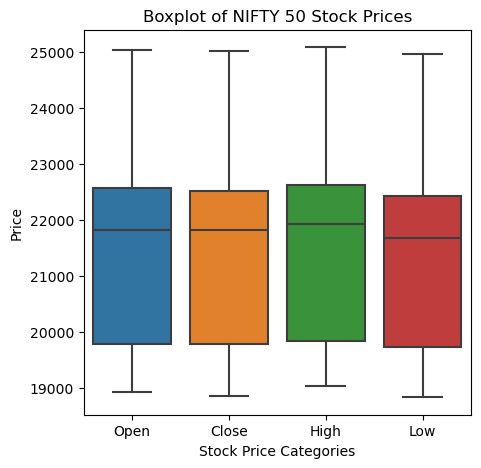


 through the boxplot we can see that there are no outlier to be removed in our dataset 
 


In [13]:
# CREATING A BOXPLOT
# Setting the plot size
plt.figure(figsize=(5,5))

# Createting a boxplot for multiple columns
sns.boxplot(data=df[['Open', 'Close', 'High', 'Low']])

plt.title('Boxplot of NIFTY 50 Stock Prices')# Setting the  plot title
plt.xlabel('Stock Price Categories')# Setting the x label 
plt.ylabel('Price')# Setting the y label 

# Display the plot
plt.show()

print("\n through the boxplot we can see that there are no outlier to be removed in our dataset \n ")

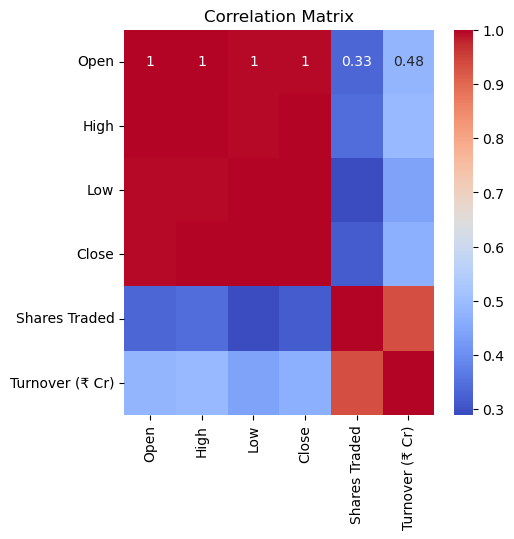

'A correlation matrix is a table showing correlation coefficients between multiple variables.\n It helps in understanding the relationships between variables in a dataset.\n A correlation coefficient of 1 shows a perfect positive relationship \n A correlation coefficient of -1 shows a perfect negative relationship \n A correlation coefficient of 0 shows no relationship between the variables'

In [14]:
# creating a correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

'''A correlation matrix is a table showing correlation coefficients between multiple variables.
 It helps in understanding the relationships between variables in a dataset.
 A correlation coefficient of 1 shows a perfect positive relationship 
 A correlation coefficient of -1 shows a perfect negative relationship 
 A correlation coefficient of 0 shows no relationship between the variables'''


In [15]:
# Save the cleaned dataset for further use
df.to_csv('nifty50_cleaned.csv', index=True)
